In [1]:
import numpy as np
import os
import time

import matplotlib
from matplotlib import pyplot as plt

In [2]:
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['legend.fontsize'] = 14
matplotlib.rcParams['axes.titlesize'] = 20

#matplotlib.rc('text', usetex=True)

## Load PROVABGS data

Downloaded from https://zenodo.org/records/8018936

In [3]:
fn_psmf_bgs_q = '../data/data_provabgs/psmf.sv3.bgs_bright_q.z0.01_0.05.dat'
ms, psmf_bgs_q_mean, psmf_bgs_q_std = np.loadtxt(fn_psmf_bgs_q, unpack=True)

fn_psmf_bgs_sf = '../data/data_provabgs/psmf.sv3.bgs_bright_sf.z0.01_0.05.dat'
ms, psmf_bgs_sf_mean, psmf_bgs_sf_std = np.loadtxt(fn_psmf_bgs_sf, unpack=True)

In [4]:
fn_smf_bgs = '../data/data_provabgs/smf.standard.sv3.bgs_bright.z0.01_0.05.dat'
ms_smf, smf_bgs = np.loadtxt(fn_smf_bgs, unpack=True)

Text(0, 0.5, '$\\Phi \\: [\\mathrm{dex}^{-1}\\, h^3 \\, \\mathrm{Mpc}^{-3}]$')

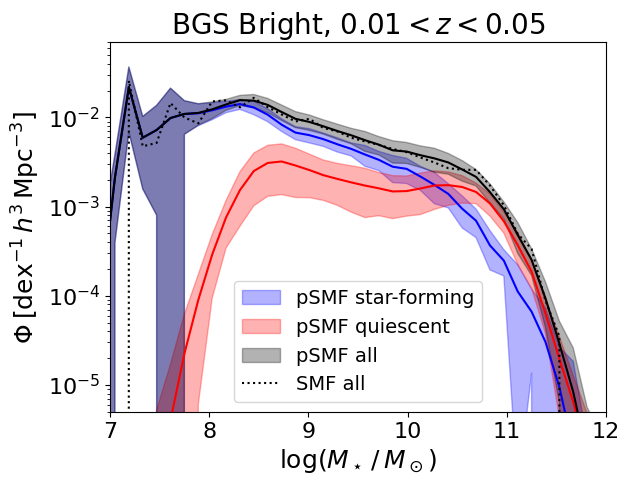

In [31]:
plt.title(r"BGS Bright, $0.01 < z < 0.05$")

plt.plot(ms, psmf_bgs_sf_mean, color='blue')
plt.fill_between(ms, 
                 psmf_bgs_sf_mean-psmf_bgs_sf_std, 
                 psmf_bgs_sf_mean+psmf_bgs_sf_std,
                 color='blue', alpha=0.3,
                 label='pSMF star-forming')

plt.plot(ms, psmf_bgs_q_mean, color='red')
plt.fill_between(ms, 
                 psmf_bgs_q_mean-psmf_bgs_q_std, 
                 psmf_bgs_q_mean+psmf_bgs_q_std,
                 color='red', alpha=0.3,
                 label='pSMF quiescent')

psmf_bgs_mean = psmf_bgs_sf_mean + psmf_bgs_q_mean
psmf_bgs_std = np.sqrt(psmf_bgs_sf_std**2 + psmf_bgs_q_std**2)

plt.plot(ms, psmf_bgs_mean, color='black')
plt.fill_between(ms, 
                 psmf_bgs_mean-psmf_bgs_std, 
                 psmf_bgs_mean+psmf_bgs_std,
                 color='black', alpha=0.3,
                 label='pSMF all')

plt.plot(ms_smf, smf_bgs, color='k', ls=':',
                 label='SMF all')

plt.legend(loc='lower center')

plt.yscale('log')
plt.xlim(7, 12)
plt.ylim(5e-6, 7e-2)

plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi \: [\mathrm{dex}^{-1}\, h^3 \, \mathrm{Mpc}^{-3}]$')

## Load CAMELS-SAM data

Downloaded from https://camels-sam.readthedocs.io/en/main/access.html

In [32]:
log_mass_shift = 9
h = 0.6711 # from perez et al
print(h**3)
vol_Mpc = (100/h)**3 # 100 Mpc/h = 100/h Mpc
vol_hMpc = 100**3 # units Mpc/h!! to match bgs; diff than plotted in camels paper
print(vol_Mpc, vol_hMpc)

0.302246803431
3308554.428527777 1000000


In [33]:
edges = np.linspace(8, 12.5, 40)

bin_width = edges[1] - edges[0]                
bins_avg = edges[0:-1] + bin_width/2.           

In [34]:
N_LH = 1000
sim_nums = np.arange(0, N_LH)
rng = np.random.default_rng(seed=42)
rng.shuffle(sim_nums)
sim_nums[:10]

array([978, 933, 859, 916, 127, 608, 856, 260, 147, 810])

In [35]:
sim_start = 0
sim_end = 1000

data_dir = '../data/data_camels-sam/data_mstars_shuffled'

log_mstars = []
for i in range(sim_start, sim_end):
    sim_num = sim_nums[i]
    fn_data = f'{data_dir}/mstars_LH_{sim_num}.npy'
    #print(fn_data)
    data_arrs = np.load(fn_data)
    data_arrs = np.load(fn_data)
    halo_ids, mstar_raw = data_arrs.T
    
    log_mstar = np.log10(mstar_raw) + log_mass_shift
    log_mstars.append(log_mstar)

/tmp/ipykernel_204339/3182765636.py:15: RuntimeWarning: divide by zero encountered in log10
  log_mstar = np.log10(mstar_raw) + log_mass_shift


In [38]:
n_plot = 30

## Plot both SMFs together

(8.0, 12.5)

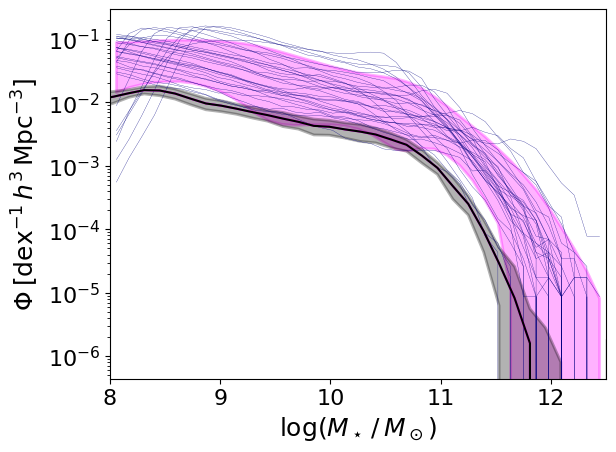

In [40]:
phi_norms = []
for i in range(len(log_mstars)):
    
    phi, edges = np.histogram(log_mstars[i], bins=edges)   
    phi_norm = phi / vol_hMpc / bin_width
    phi_norms.append(phi_norm)
    
for i in range(n_plot):
    plt.plot(bins_avg, phi_norms[i], lw=0.2, color='navy')
    
smf_mean = np.mean(phi_norms, axis=0)
smf_std = np.std(phi_norms, axis=0)
plt.plot(ms, psmf_bgs_mean, color='magenta')
plt.fill_between(bins_avg, 
                 (smf_mean-smf_std), 
                 (smf_mean+smf_std),
                 color='magenta', alpha=0.3, lw=2,
                 label='pSMF all')

plt.yscale('log')
plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi \: [\mathrm{dex}^{-1}\, h^3 \, \mathrm{Mpc}^{-3}]$')

#rescale_noh = 1/0.7**3
rescale_noh = 1
plt.plot(ms, psmf_bgs_mean*rescale_noh, color='black')
plt.fill_between(ms, 
                 (psmf_bgs_mean-psmf_bgs_std)*rescale_noh, 
                 (psmf_bgs_mean+psmf_bgs_std)*rescale_noh,
                 color='black', alpha=0.3, lw=2,
                 label='pSMF all')

plt.xlim(8, 12.5)
#plt.savefig('smf_camelssam_shuffled_n1-10.png')

(8.0, 12.5)

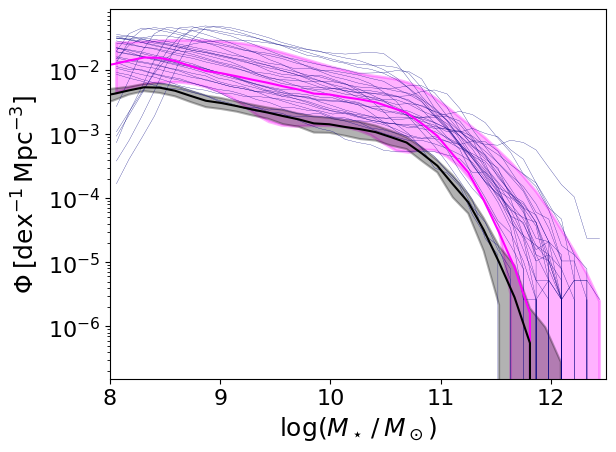

In [41]:
phi_norms = []
for i in range(len(log_mstars)):
    
    phi, edges = np.histogram(log_mstars[i], bins=edges)   
    phi_norm = phi / vol_Mpc / bin_width
    phi_norms.append(phi_norm)

for i in range(n_plot):
    plt.plot(bins_avg, phi_norms[i], lw=0.2, color='navy')
    

smf_mean = np.mean(phi_norms, axis=0)
smf_std = np.std(phi_norms, axis=0)
plt.plot(ms, psmf_bgs_mean, color='magenta')
plt.fill_between(bins_avg, 
                 (smf_mean-smf_std), 
                 (smf_mean+smf_std),
                 color='magenta', alpha=0.3, lw=2,
                 label='pSMF all')
    
plt.yscale('log')
plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi \: [\mathrm{dex}^{-1}\, \mathrm{Mpc}^{-3}]$')

# psmf orig in (h^3 Mpc^-3); so need to mult by 0.7**3
rescale_noh = 0.7**3
#rescale_noh = 1
plt.plot(ms, psmf_bgs_mean*rescale_noh, color='black')
plt.fill_between(ms, 
                 (psmf_bgs_mean-psmf_bgs_std)*rescale_noh, 
                 (psmf_bgs_mean+psmf_bgs_std)*rescale_noh,
                 color='black', alpha=0.3, lw=1.5,
                 label='pSMF all')

plt.xlim(8, 12.5)
#plt.savefig('smf_camelssam_shuffled_n1-10.png')

## Check number densities

In [42]:
ndens_arr = []
for i in range(sim_start, sim_end):
    phi, edges = np.histogram(log_mstars[i], bins=edges)   
    phi_norm = phi / vol_hMpc / bin_width

    ndens_trapz = np.trapz(phi_norm, x=bins_avg)
    ndens = len(log_mstars[i][log_mstars[i]>edges[0]])/vol_hMpc
    #print("Num dens from integration:", ndens)
    #print("Num dens direct:", )
    ndens_arr.append(ndens)

In [43]:
print("PROVABGS num dens from integration (all):", np.trapz(psmf_bgs_mean, x=ms))
ndens_bgs = np.trapz(psmf_bgs_mean[ms>edges[0]], x=ms[ms>edges[0]])
print(f"PROVABGS num dens from integration (logM>{edges[0]}):", ndens_bgs)

PROVABGS num dens from integration (all): 0.03209675793436594
PROVABGS num dens from integration (logM>8.0): 0.021533505401047537


Text(0, 0.5, 'number per bin')

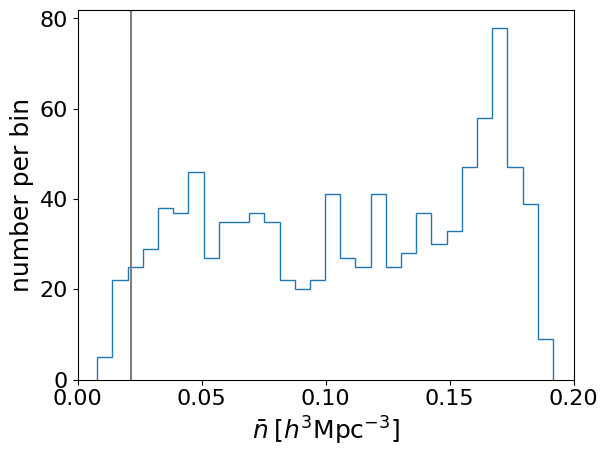

In [57]:
plt.hist(ndens_arr, bins=30, histtype='step')
plt.axvline(ndens_bgs, color='grey')
plt.xlim(0, 0.2)
plt.xlabel(r'$\bar{n} \: [h^{3} \mathrm{Mpc}^{-3}]$')
plt.ylabel('number per bin')

## Downsample CAMELS-SAM!

In [47]:
rng = np.random.default_rng(seed=42)

ndens_target = ndens_bgs
N_target = round(ndens_target*vol_hMpc)
print(N_target)
log_mstars_down = []
for i in range(sim_start, sim_end):
    log_mstar_threshed = log_mstars[i][log_mstars[i]>edges[0]]
    #ndens = len(log_mstars_threshed)/vol_hMpc
    #N_downsample = ndens_target/ndens
    N = N_target
    log_mstar_down = rng.choice(log_mstar_threshed, size=min(N_target, len(log_mstar_threshed)), replace=False)
    log_mstars_down.append(log_mstar_down)

21534


(8.0, 12.5)

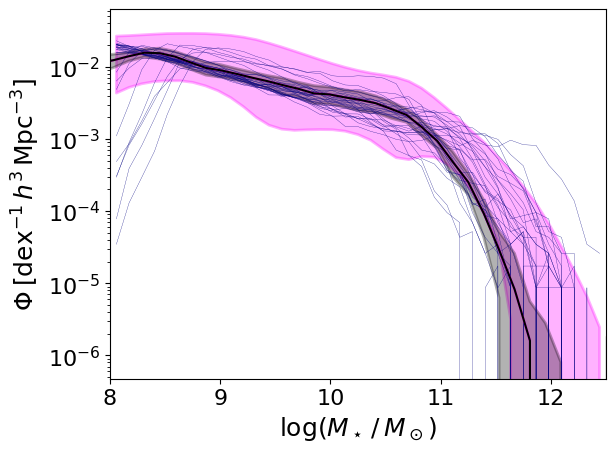

In [50]:
phi_norms_down = []
for i in range(len(log_mstars_down)):
    
    phi, edges = np.histogram(log_mstars_down[i], bins=edges)   
    phi_norm = phi / vol_hMpc / bin_width
    phi_norms_down.append(phi_norm)

    
for i in range(n_plot):
    plt.plot(bins_avg, phi_norms_down[i], lw=0.2, color='navy')
    

smf_mean = np.mean(phi_norms, axis=0)
smf_std = np.std(phi_norms, axis=0)
plt.plot(ms, psmf_bgs_mean, color='magenta')
plt.fill_between(bins_avg, 
                 (smf_mean-smf_std), 
                 (smf_mean+smf_std),
                 color='magenta', alpha=0.3, lw=2,
                 label='pSMF all')

plt.yscale('log')
plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi \: [\mathrm{dex}^{-1}\, h^3 \, \mathrm{Mpc}^{-3}]$')

#rescale_noh = 1/0.7**3
rescale_noh = 1
plt.plot(ms, psmf_bgs_mean*rescale_noh, color='black')
plt.fill_between(ms, 
                 (psmf_bgs_mean-psmf_bgs_std)*rescale_noh, 
                 (psmf_bgs_mean+psmf_bgs_std)*rescale_noh,
                 color='black', alpha=0.3, lw=2,
                 label='pSMF all')

plt.xlim(8, 12.5)
#plt.savefig('smf_camelssam_shuffled_n1-10.png')

## Get consistent models

In [51]:
def get_distance_sigma(x1, y1, yerr1, x2, y2, xrange):
    xmin, xmax = xrange

    y1 = y1[(x1>=xmin) & (x1<xmax)]
    yerr1 = yerr1[(x1>=xmin) & (x1<xmax)]
    y2 = y2[(x2>=xmin) & (x2<xmax)]

    x1 = x1[(x1>=xmin) & (x1<xmax)]
    x2 = x2[(x2>=xmin) & (x2<xmax)]
    
    # interpolate y2 to be at the same x-vals as x2/y2
    y2_interp = np.interp(x1, x2, y2)
    sigmas = (y2_interp - y1)/yerr1
    sigma_mean = np.mean(np.abs(sigmas))
    return sigma_mean

In [52]:
sigma_means = []
xrange = [8,11]
for i in range(len(log_mstars_down)):
    
    phi, edges = np.histogram(log_mstars_down[i], bins=edges)   
    phi_norm = phi / vol_hMpc / bin_width

    sigma_mean = get_distance_sigma(ms, psmf_bgs_mean, psmf_bgs_std, bins_avg, phi_norm, xrange)
    sigma_means.append(sigma_mean)
sigma_means = np.array(sigma_means)

Text(0, 0.5, 'number in bin')

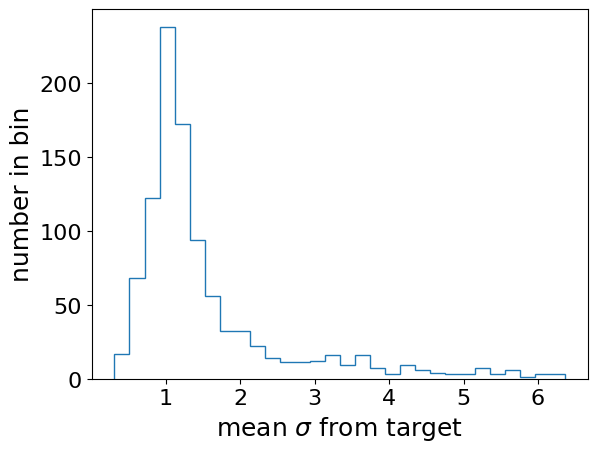

In [55]:
plt.hist(sigma_means, bins=30, histtype='step')
plt.xlabel(r'mean $\sigma$ from target')
plt.ylabel('number in bin')

In [56]:
for sig in range(1, 4):
    print(f'Fraction within {sig}\sigma: {np.sum(sigma_means<sig)/len(sigma_means):.2f}')

Fraction within 1\sigma: 0.30
Fraction within 2\sigma: 0.81
Fraction within 3\sigma: 0.89
